In [14]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14,6]
import matplotlib.pylab as pl
import seaborn as sns
sns.set()
from scipy.stats import median_absolute_deviation as mad

In [9]:
map_data = np.load('../../../outputs/tile_maps/S08XX_rf1XX_healpix_map.npz', allow_pickle=True)
map_data = {key:map_data[key].item() for key in map_data}
heal_maps = map_data['healpix_maps']
ref_maps = map_data['ref_maps']
tile_maps = map_data['tile_maps']
sat_maps = map_data['sat_map']
times = map_data['times']

heal_map = heal_maps['0']
tile_map = tile_maps['0']
ref_map = ref_maps['0']
sat_map = sat_maps['0']
times = times['0']

map_counts = [len(i) for i in heal_map]

In [10]:
heal_mads = [mad(i) for i in heal_map]
np.nanargmax(heal_mads)

134

In [11]:
np.argmax(map_counts)

5193

In [16]:
def plt_pix_data(ref, tile, heal, pix):
    ref_data = ref[pix]
    tile_data = tile[pix]
    heal_data = heal[pix]
    pix_sat_data = sat_map[pix]
    pix_time_data = times[pix]
    
    print(len(tile_data))
    
    f, axes = plt.subplots(1, 1, figsize=(14, 6), sharex=True)
    norad_ids, counts = np.unique(pix_sat_data, return_counts=True)
    sns.set()
    index = np.arange(len(norad_ids))
    plt.bar(index, counts, color=sns.color_palette('Spectral', len(counts)), alpha=0.9)
    plt.xticks(index, norad_ids, rotation=90)
    plt.title(f'Satellite passes in Healpix pixel: {pix}')
    plt.tight_layout()
    plt.show()
    plt.close()
        
    ref_sat_data = {n:np.asarray(ref_data)[np.where(np.asarray(pix_sat_data) == n)] for n in norad_ids}
    tile_sat_data = {n:np.asarray(tile_data)[np.where(np.asarray(pix_sat_data) == n)] for n in norad_ids}
    heal_sat_data = {n:np.asarray(heal_data)[np.where(np.asarray(pix_sat_data) == n)] for n in norad_ids}
    time_data = {n:np.asarray((np.asarray(pix_time_data)-pix_time_data[0])/(60*60*24))[np.where(np.asarray(pix_sat_data) == n)] for n in norad_ids}    
    n = len(time_data)
    colors = pl.cm.Spectral(np.linspace(0,1,n))
    
    for k in range(n):
        plt.scatter(time_data[norad_ids[k]], ref_sat_data[norad_ids[k]],s=70, color=colors[k], edgecolors='grey', label=f'{norad_ids[k]}')
        
    plt.xlabel('Days from start')
    plt.title(f'REF Power in Pix: {pix}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()
    
    for k in range(n):
        plt.scatter(time_data[norad_ids[k]], tile_sat_data[norad_ids[k]],s=70, color=colors[k], edgecolors='grey', label=f'{norad_ids[k]}')
        
    plt.xlabel('Days from start')
    plt.title(f'Tile Power in Pix: {pix}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()

    for k in range(n):
        plt.scatter(time_data[norad_ids[k]], heal_sat_data[norad_ids[k]],s=70, color=colors[k], edgecolors='grey', label=f'{norad_ids[k]}')
    
    med = np.median(heal_data)
    MAD = mad(heal_data)
    
    print(f'Passes: {len(tile_data)}, Median: {med}, MAD: {MAD}')
    
    plt.axhline(y=med)
    plt.axhspan(ymin=(med-MAD), ymax=(med+MAD), alpha=0.1)
    plt.xlabel('Days from start')
    plt.title(f'DIFF Power in Pix: {pix}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()

107


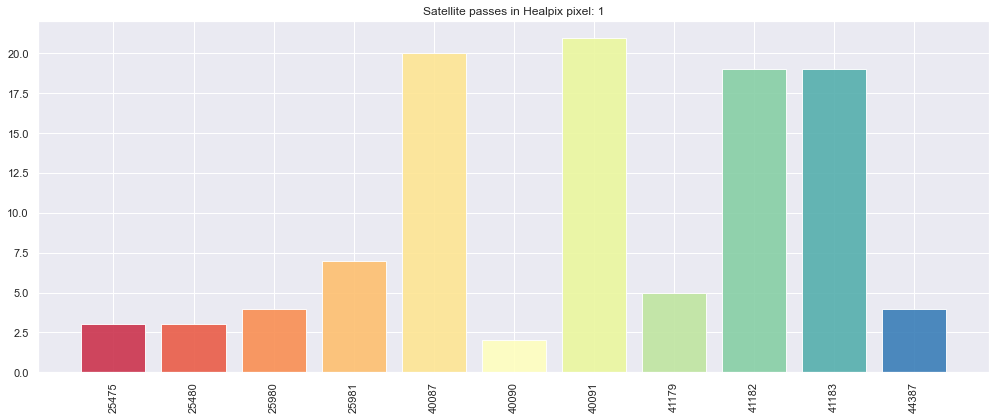

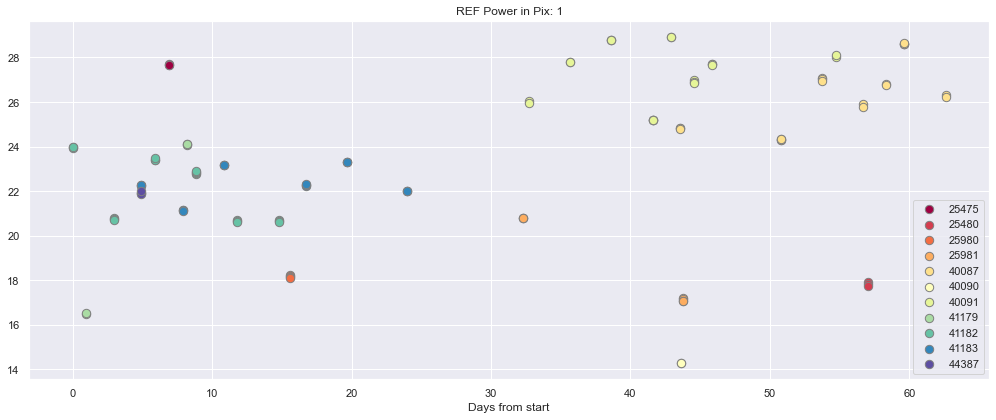

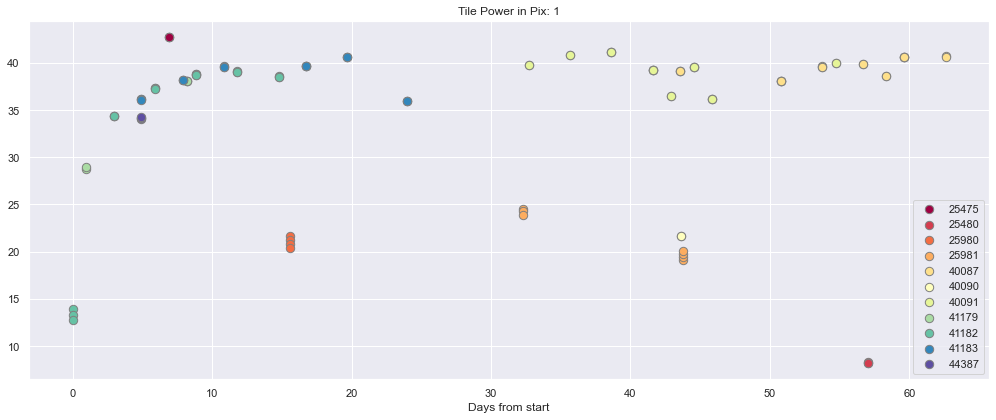

Passes: 107, Median: 13.744091033935547, MAD: 2.606172402191162


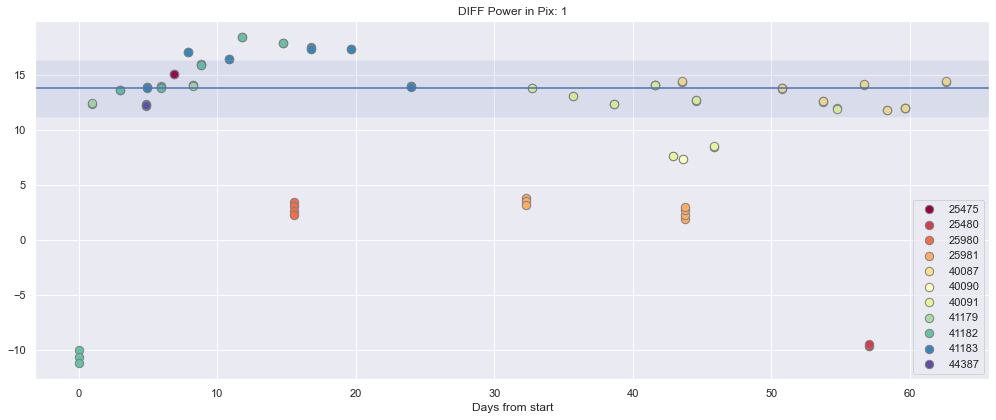

In [17]:
plt_pix_data(ref_map, tile_map, heal_map, 1)
# pix 134 has worst MAD